In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('data/listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20250624193519,2025-06-28,city scrape,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Please note that elevated rates apply for New ...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,...,4.91,4.78,4.67,NaN,f,1,1,0,0,1.86
1,25026,https://www.airbnb.com/rooms/25026,20250624193519,2025-07-04,city scrape,Beautiful Modern Decorated Studio in Copacabana,"**Fully renovated in Dec 2022, new kitchen, n...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/7c08fa4f-1d7b...,102840,...,4.93,4.85,4.65,NaN,f,1,1,0,0,1.71
2,35764,https://www.airbnb.com/rooms/35764,20250624193519,2025-06-25,city scrape,COPACABANA SEA BREEZE - RIO - 25 X Superhost,Our newly renovated studio is located in the b...,Our guests will experience living with a local...,https://a0.muscache.com/pictures/23782972/1d3e...,153691,...,4.95,4.95,4.89,NaN,f,1,1,0,0,2.88
3,48305,https://www.airbnb.com/rooms/48305,20250624193519,2025-06-26,city scrape,Bright 6bed Penthouse Seconds from Beach,Enter Bossa Nova's history by staying in the v...,Enter Bossa Nova history by staying in the ver...,https://a0.muscache.com/pictures/miso/Hosting-...,70933,...,4.84,4.95,4.59,NaN,t,6,5,1,0,1.05
4,48901,https://www.airbnb.com/rooms/48901,20250624193519,2025-07-01,city scrape,Extra large 4BD 3BT on the AtlanticAve. Copaca...,LARGE Beach side 4 bedrooms 2 Complete bathro...,"Plenty of shops, entertainment andrestaurants<...",https://a0.muscache.com/pictures/hosting/Hosti...,222884,...,4.83,4.94,4.60,NaN,f,1,1,0,0,0.40


In [ ]:
print(f'Size: {df.shape[0]} examples\n')

for i in range(df.shape[1]):
    col = df.columns[i]
    print(f'{i+1}:\t {col}  |  {df[col].dtype} ({df[col].nunique()})  |  nº NAN: {df[col].isna().sum()}')

Size: 42572 examples

1:	 id  |  int64 (42572)  |  nº NAN: 0
2:	 listing_url  |  object (42572)  |  nº NAN: 0
3:	 scrape_id  |  int64 (1)  |  nº NAN: 0
4:	 last_scraped  |  object (8)  |  nº NAN: 0
5:	 source  |  object (2)  |  nº NAN: 0
6:	 name  |  object (40289)  |  nº NAN: 0
7:	 description  |  object (38004)  |  nº NAN: 1011
8:	 neighborhood_overview  |  object (14274)  |  nº NAN: 26059
9:	 picture_url  |  object (41726)  |  nº NAN: 0
10:	 host_id  |  int64 (24935)  |  nº NAN: 0
11:	 host_url  |  object (24935)  |  nº NAN: 0
12:	 host_name  |  object (7058)  |  nº NAN: 1480
13:	 host_since  |  object (4948)  |  nº NAN: 1543
14:	 host_location  |  object (626)  |  nº NAN: 9848
15:	 host_about  |  object (8725)  |  nº NAN: 23175
16:	 host_response_time  |  object (4)  |  nº NAN: 8004
17:	 host_response_rate  |  object (85)  |  nº NAN: 8004
18:	 host_acceptance_rate  |  object (100)  |  nº NAN: 4994
19:	 host_is_superhost  |  object (2)  |  nº NAN: 1376
20:	 host_thumbnail_url  |  ob

(todo exemplo tem pelo menos 1 atributo ausente)

---
## info do host

In [4]:
df[[
    'host_location',
    'host_response_time', #ok
    'host_response_rate', #ok
    'host_is_superhost', #ok
    'host_total_listings_count', #ok
    'host_identity_verified', #ok
    'host_verifications'
]]

,host_location,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_identity_verified,host_verifications
0,"Rio de Janeiro, Brazil",within an hour,100%,f,5.0,t,"['email', 'phone']"
1,"Rio de Janeiro, Brazil",NaN,NaN,t,5.0,t,"['email', 'phone']"
2,"Rio de Janeiro, Brazil",within an hour,100%,t,2.0,t,"['email', 'phone']"
3,"Rio de Janeiro, Brazil",within an hour,100%,t,33.0,t,"['email', 'phone', 'work_email']"
4,"Rio de Janeiro, Brazil",within an hour,100%,f,7.0,t,"['email', 'phone']"
...,...,...,...,...,...,...,...
42567,NaN,NaN,NaN,f,1.0,t,['phone']
42568,"Rio de Janeiro, Brazil",NaN,NaN,f,1.0,t,"['email', 'phone']"
42569,NaN,within an hour,93%,t,12.0,t,"['email', 'phone']"
42570,Brazil,NaN,NaN,f,1.0,t,['phone']


In [33]:
df['host_location'].value_counts()

host_location
Rio de Janeiro, Brazil             25166
State of Rio de Janeiro, Brazil     2277
Rio, Brazil                          817
Brazil                               672
São Paulo, Brazil                    645
                                   ...  
Presidente Venceslau, Brazil           1
Beaulieu-sur-Mer, France               1
Manchester, United Kingdom             1
Maravilha, Brazil                      1
Mariana, Brazil                        1
Name: count, Length: 626, dtype: int64

In [40]:
df.loc[df['host_location'].str.contains('(Rio,)|(Rio de Janeiro)', regex=True, na=False), 'host_location'].value_counts()

/tmp/ipykernel_25754/167682424.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[df['host_location'].str.contains('(Rio,)|(Rio de Janeiro)', regex=True, na=False), 'host_location'].value_counts()


host_location
Rio de Janeiro, Brazil             25166
State of Rio de Janeiro, Brazil     2277
Rio, Brazil                          817
Name: count, dtype: int64

In [47]:
bairros = df['neighbourhood_cleansed'].unique()

In [59]:
df.loc[df['host_location'].isna() & df['host_neighbourhood'].notna(), 'host_neighbourhood']

68                   Vidigal
85                Copacabana
94                Copacabana
229               Copacabana
330               Copacabana
                ...         
42561    Vicente de Carvalho
42562                 Cosmos
42565                Ipanema
42567             Copacabana
42569                Ipanema
Name: host_neighbourhood, Length: 7347, dtype: object

In [63]:
mask = df.apply(lambda x: ((x.host_location=='Rio de Janeiro, Brazil') or (x.host_location=='Rio, Brazil')) and (x.host_neighbourhood not in bairros), axis=1)
df.loc[mask, ['host_location','host_neighbourhood']]

,host_location,host_neighbourhood
25,"Rio de Janeiro, Brazil",Jardin Botânico
31,"Rio de Janeiro, Brazil",Lapa
66,"Rio de Janeiro, Brazil",NaN
67,"Rio de Janeiro, Brazil",Lapa
71,"Rio de Janeiro, Brazil",Jardin Botânico
...,...,...
42251,"Rio de Janeiro, Brazil",Vila de Ponta Negra
42321,"Rio de Janeiro, Brazil",NaN
42384,"Rio de Janeiro, Brazil",Ilha do Governador
42398,"Rio de Janeiro, Brazil",City Areal


In [60]:
#df['host_neighbourhood_plus'] = 
df.apply(lambda x: ((x.host_location=='Rio de Janeiro, Brazil') or (x.host_location=='Rio, Brazil')) or (x.host_neighbourhood in bairros), axis=1)

0        True
1        True
2        True
3        True
4        True
         ... 
42567    True
42568    True
42569    True
42570    True
42571    True
Length: 42572, dtype: bool

In [20]:
pd.isna(df.at[35,'price'])

True

In [22]:
df['price'] = df['price'].apply(lambda x: x if pd.isna(x) else float(x[1:].replace(',','')))

<Axes: xlabel='maximum_nights_avg_ntm', ylabel='price'>

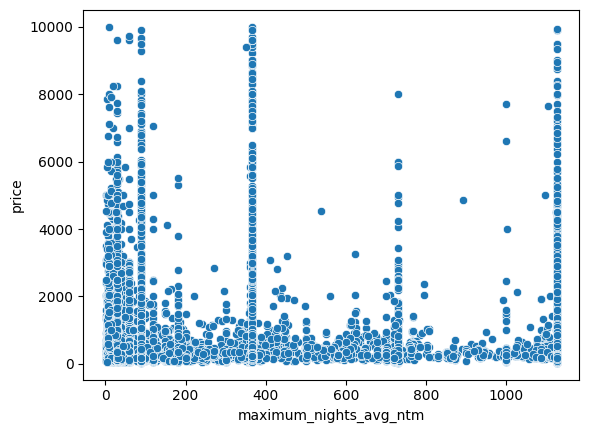

In [26]:
sns.scatterplot(df[df['price']<10000], x='maximum_nights_avg_ntm', y='price')

---
## info da casa

In [68]:
print(f'Size: {df.shape[0]} examples\n')

for i in range(df.shape[1]):
    col = df.columns[i]
    print(f'{i+1}:\t {col}  |  {df[col].dtype} ({df[col].nunique()})  |  nº NAN: {df[col].isna().sum()}')

Size: 42572 examples

1:	 id  |  int64 (42572)  |  nº NAN: 0
2:	 listing_url  |  object (42572)  |  nº NAN: 0
3:	 scrape_id  |  int64 (1)  |  nº NAN: 0
4:	 last_scraped  |  object (8)  |  nº NAN: 0
5:	 source  |  object (2)  |  nº NAN: 0
6:	 name  |  object (40289)  |  nº NAN: 0
7:	 description  |  object (38004)  |  nº NAN: 1011
8:	 neighborhood_overview  |  object (14274)  |  nº NAN: 26059
9:	 picture_url  |  object (41726)  |  nº NAN: 0
10:	 host_id  |  int64 (24935)  |  nº NAN: 0
11:	 host_url  |  object (24935)  |  nº NAN: 0
12:	 host_name  |  object (7058)  |  nº NAN: 1480
13:	 host_since  |  object (4948)  |  nº NAN: 1543
14:	 host_location  |  object (626)  |  nº NAN: 9848
15:	 host_about  |  object (8725)  |  nº NAN: 23175
16:	 host_response_time  |  object (4)  |  nº NAN: 8004
17:	 host_response_rate  |  object (85)  |  nº NAN: 8004
18:	 host_acceptance_rate  |  object (100)  |  nº NAN: 4994
19:	 host_is_superhost  |  object (2)  |  nº NAN: 1376
20:	 host_thumbnail_url  |  ob

In [3]:
df[[
    'latitude', #ok
    'longitude', #ok
    'neighbourhood_cleansed',
    'property_type', #talvez?
    'room_type', #ok
    'accommodates', #ok
    'bathrooms',
    'bedrooms', #ok
    'beds', #ok
    'amenities',
    #'bathrooms', #ok (o atualizado, vindo de bathrooms_text)
    #'bathroom_type' #ok

]]

,latitude,longitude,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities
0,-22.965990,-43.179400,Copacabana,Entire condo,Entire home/apt,5,1.0,2.0,2.0,"[""Oven"", ""Building staff"", ""TV with standard c..."
1,-22.976490,-43.191220,Copacabana,Entire rental unit,Entire home/apt,3,1.0,1.0,2.0,"[""Window AC unit"", ""Room-darkening shades"", ""D..."
2,-22.981070,-43.191360,Copacabana,Entire loft,Entire home/apt,2,1.5,1.0,1.0,"[""Building staff"", ""Bed linens"", ""Heating"", ""P..."
3,-22.985910,-43.203020,Ipanema,Entire rental unit,Entire home/apt,13,7.0,6.0,7.0,"[""Pack \u2019n play/Travel crib"", ""Private pat..."
4,-22.965740,-43.175140,Copacabana,Entire rental unit,Entire home/apt,10,2.5,4.0,4.0,"[""Microwave"", ""Dedicated workspace"", ""Hot wate..."
...,...,...,...,...,...,...,...,...,...,...
42567,-22.974055,-43.189129,Copacabana,Entire rental unit,Entire home/apt,3,1.0,1.0,2.0,"[""Exterior security cameras on property"", ""TV""..."
42568,-22.979640,-43.423380,Camorim,Private room in rental unit,Private room,2,1.0,1.0,1.0,"[""Exterior security cameras on property"", ""Ded..."
42569,-22.983102,-43.208741,Ipanema,Shared room in hostel,Shared room,9,6.0,NaN,1.0,"[""Microwave"", ""Coffee maker: drip coffee maker..."
42570,-22.984526,-43.431740,Camorim,Private room in rental unit,Private room,2,1.0,1.0,1.0,"[""Dedicated workspace"", ""TV"", ""Kitchen"", ""Free..."


In [4]:
df['bathrooms_text'].unique()

array(['1 bath', '1.5 baths', '7 baths', '2.5 baths', '1 private bath',
       '0 shared baths', '0 baths', '1 shared bath', '4 baths', '2 baths',
       '2 shared baths', '1.5 shared baths', '5 shared baths', '5 baths',
       '3 baths', nan, '2.5 shared baths', '4.5 baths', '3.5 baths',
       '8 baths', 'Shared half-bath', 'Half-bath', '6.5 baths',
       '3.5 shared baths', '3 shared baths', '5.5 baths', '7.5 baths',
       '6 baths', '8.5 baths', '20 shared baths', '7 shared baths',
       '4.5 shared baths', '10 baths', '15.5 baths', '12 baths',
       '6 shared baths', 'Private half-bath', '4 shared baths', '9 baths',
       '11 baths', '16 baths', '8 shared baths', '11.5 baths',
       '6.5 shared baths', '9.5 baths', '10.5 baths', '12.5 baths',
       '11 shared baths', '10 shared baths'], dtype=object)

In [39]:
import re

In [74]:
bathrooms = df['bathrooms_text'].str.extract('([0-9\.]+)?([- A-Za-z]+)')#[[0,2]]
bathrooms[1] = bathrooms[1].apply(lambda x: x if pd.isna(x) else x.strip().lower().replace('baths','bath'))
bathrooms.columns = ['n_baths', 'bath_type']

for i in range(len(bathrooms)):
    bt = bathrooms.at[i,'bath_type']
    if(pd.notna(bt)):
        if(re.search('half', bt)):
            bt = re.sub('half-', '', bt)
            bathrooms.loc[i,:] = [0.5, bt]

        if(bt=='bath'):
            bathrooms.at[i,'bath_type'] = 'regular bath'
        #else:
        #    bathrooms.at[i,'bath_type'] = re.sub(' bath', '', bt)

    
print(bathrooms['n_baths'].unique())
print(bathrooms['bath_type'].value_counts())

df['bathrooms'] = bathrooms['n_baths']
df['bathroom_type'] = bathrooms['bath_type']

df[[
    'latitude', #ok
    'longitude', #ok
    'neighbourhood_cleansed',
    'property_type',
    'room_type', #ok
    'accommodates', #ok
    'bedrooms', #ok
    'beds', #ok
    'bathrooms', #ok (o atualizado, vindo de bathrooms_text)
    'bathroom_type', #ok
    'amenities',

]]

['1' '1.5' '7' '2.5' '0' '4' '2' '5' '3' nan '4.5' '3.5' '8' 0.5 '6.5'
 '5.5' '7.5' '6' '8.5' '20' '10' '15.5' '12' '9' '11' '16' '11.5' '9.5'
 '10.5' '12.5']
bath_type
regular bath    35630
shared bath      3743
private bath     3143
Name: count, dtype: int64


,latitude,longitude,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,bathrooms,bathroom_type,amenities
0,-22.965990,-43.179400,Copacabana,Entire condo,Entire home/apt,5,2.0,2.0,1,regular bath,"[""Oven"", ""Building staff"", ""TV with standard c..."
1,-22.976490,-43.191220,Copacabana,Entire rental unit,Entire home/apt,3,1.0,2.0,1,regular bath,"[""Window AC unit"", ""Room-darkening shades"", ""D..."
2,-22.981070,-43.191360,Copacabana,Entire loft,Entire home/apt,2,1.0,1.0,1.5,regular bath,"[""Building staff"", ""Bed linens"", ""Heating"", ""P..."
3,-22.985910,-43.203020,Ipanema,Entire rental unit,Entire home/apt,13,6.0,7.0,7,regular bath,"[""Pack \u2019n play/Travel crib"", ""Private pat..."
4,-22.965740,-43.175140,Copacabana,Entire rental unit,Entire home/apt,10,4.0,4.0,2.5,regular bath,"[""Microwave"", ""Dedicated workspace"", ""Hot wate..."
...,...,...,...,...,...,...,...,...,...,...,...
42567,-22.974055,-43.189129,Copacabana,Entire rental unit,Entire home/apt,3,1.0,2.0,1,regular bath,"[""Exterior security cameras on property"", ""TV""..."
42568,-22.979640,-43.423380,Camorim,Private room in rental unit,Private room,2,1.0,1.0,1,private bath,"[""Exterior security cameras on property"", ""Ded..."
42569,-22.983102,-43.208741,Ipanema,Shared room in hostel,Shared room,9,NaN,1.0,6,shared bath,"[""Microwave"", ""Coffee maker: drip coffee maker..."
42570,-22.984526,-43.431740,Camorim,Private room in rental unit,Private room,2,1.0,1.0,1,private bath,"[""Dedicated workspace"", ""TV"", ""Kitchen"", ""Free..."


In [157]:
for pt, quant in df['property_type'].value_counts().reset_index().values:
    print(f'{pt:40} => {quant}')

Entire rental unit                       => 27839
Private room in rental unit              => 4929
Entire home                              => 2079
Entire condo                             => 1812
Private room in home                     => 1489
Entire loft                              => 833
Entire serviced apartment                => 763
Room in hotel                            => 417
Private room in bed and breakfast        => 406
Private room in condo                    => 359
Shared room in rental unit               => 166
Entire guesthouse                        => 129
Private room in guesthouse               => 125
Room in aparthotel                       => 118
Shared room in home                      => 99
Entire villa                             => 95
Private room in guest suite              => 89
Private room in serviced apartment       => 74
Tiny home                                => 71
Entire guest suite                       => 65
Shared room in bed and breakfast        

In [159]:
df['property_type'].nunique()

82

In [166]:
teste = df['property_type']

teste = teste.str.replace('(Private room( in )?)|(Shared room( in )?)|(Entire )|(Room in )', '', regex=True).str.lower()
teste = teste.replace({'casa particular':'home'})

for pt, quant in teste.value_counts().reset_index().values:
    print(f'{pt:40} => {quant}')

rental unit                              => 32934
home                                     => 3712
condo                                    => 2176
loft                                     => 856
serviced apartment                       => 848
bed and breakfast                        => 469
hotel                                    => 424
guesthouse                               => 287
guest suite                              => 155
aparthotel                               => 119
villa                                    => 113
tiny home                                => 75
hostel                                   => 69
townhouse                                => 50
cottage                                  => 33
cabin                                    => 32
                                         => 29
place                                    => 28
boutique hotel                           => 22
vacation home                            => 21
earthen home                             => 2

In [ ]:
teste = df['property_type']

teste = teste.str.replace('(Private room( in )?)|(Shared room( in )?)|(Entire )|(Room in )', '', regex=True).str.lower()
teste = teste.replace({'casa particular':'home'})

for pt, quant in teste.value_counts().reset_index().values:
    print(f'{pt:40} => {quant}  |\t{((quant/teste.shape[0])*100):.2f}%')

rental unit                              => 21076  |	79.20%
home                                     => 1856  |	6.97%
condo                                    => 1399  |	5.26%
loft                                     => 651  |	2.45%
serviced apartment                       => 625  |	2.35%
bed and breakfast                        => 226  |	0.85%
guesthouse                               => 170  |	0.64%
hotel                                    => 134  |	0.50%
guest suite                              => 91  |	0.34%
aparthotel                               => 85  |	0.32%
tiny home                                => 47  |	0.18%
villa                                    => 46  |	0.17%
hostel                                   => 39  |	0.15%
townhouse                                => 37  |	0.14%
place                                    => 24  |	0.09%
cabin                                    => 22  |	0.08%
                                         => 15  |	0.06%
earthen home                       

In [164]:
teste.nunique()

46

## info das reviews

In [12]:
print(f'Size: {df.shape[0]} examples\n')

for i in range(df.shape[1]):
    col = df.columns[i]
    print(f'{i+1}:\t {col}  |  {df[col].dtype} ({df[col].nunique()})  |  nº NAN: {df[col].isna().sum()}')

Size: 42572 examples

1:	 id  |  int64 (42572)  |  nº NAN: 0
2:	 listing_url  |  object (42572)  |  nº NAN: 0
3:	 scrape_id  |  int64 (1)  |  nº NAN: 0
4:	 last_scraped  |  object (8)  |  nº NAN: 0
5:	 source  |  object (2)  |  nº NAN: 0
6:	 name  |  object (40289)  |  nº NAN: 0
7:	 description  |  object (38004)  |  nº NAN: 1011
8:	 neighborhood_overview  |  object (14274)  |  nº NAN: 26059
9:	 picture_url  |  object (41726)  |  nº NAN: 0
10:	 host_id  |  int64 (24935)  |  nº NAN: 0
11:	 host_url  |  object (24935)  |  nº NAN: 0
12:	 host_name  |  object (7058)  |  nº NAN: 1480
13:	 host_since  |  object (4948)  |  nº NAN: 1543
14:	 host_location  |  object (626)  |  nº NAN: 9848
15:	 host_about  |  object (8725)  |  nº NAN: 23175
16:	 host_response_time  |  object (4)  |  nº NAN: 8004
17:	 host_response_rate  |  object (85)  |  nº NAN: 8004
18:	 host_acceptance_rate  |  object (100)  |  nº NAN: 4994
19:	 host_is_superhost  |  object (2)  |  nº NAN: 1376
20:	 host_thumbnail_url  |  ob

In [ ]:
df[[
    'number_of_reviews', #ok
    'number_of_reviews_l30d', #ok
    'review_scores_rating', #ok
    'review_scores_accuracy', #ok
    'review_scores_cleanliness', #ok
    'review_scores_checkin', #ok
    'review_scores_communication', #ok
    'review_scores_location', #
    'review_scores_value',
]]

,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,338,1,4.71,4.76,4.64,4.83,4.91,4.78,4.67
1,313,2,4.75,4.74,4.81,4.83,4.93,4.85,4.65
2,516,2,4.91,4.94,4.92,4.97,4.95,4.95,4.89
3,183,0,4.77,4.74,4.73,4.84,4.84,4.95,4.59
4,48,1,4.63,4.67,4.42,4.88,4.83,4.94,4.60
...,...,...,...,...,...,...,...,...,...
42567,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42568,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42569,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42570,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


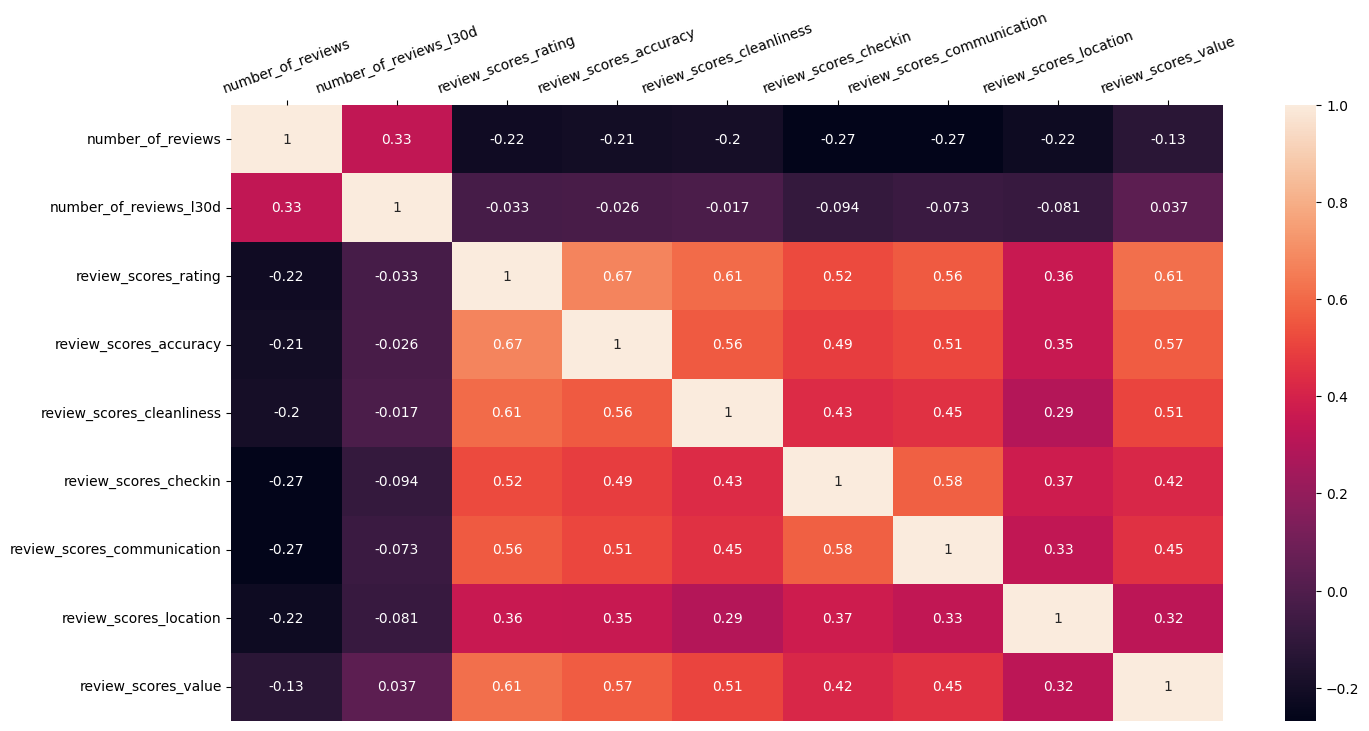

In [81]:
teste = df[[
    'number_of_reviews', #ok
    'number_of_reviews_l30d', #ok
    'review_scores_rating', #ok
    'review_scores_accuracy',
    'review_scores_cleanliness', # (nn tô incluindo outras features de review para ter melhor interpretabilidade dos resultados depois) 
    'review_scores_checkin', #ok
    'review_scores_communication',
    'review_scores_location', #ok
    'review_scores_value',
]].dropna().corr('kendall')

plt.figure(figsize=(16,8))
hm = sns.heatmap(teste, annot=True)
hm.set(xlabel="", ylabel="")
hm.xaxis.tick_top()
plt.xticks(rotation=20)
plt.show()

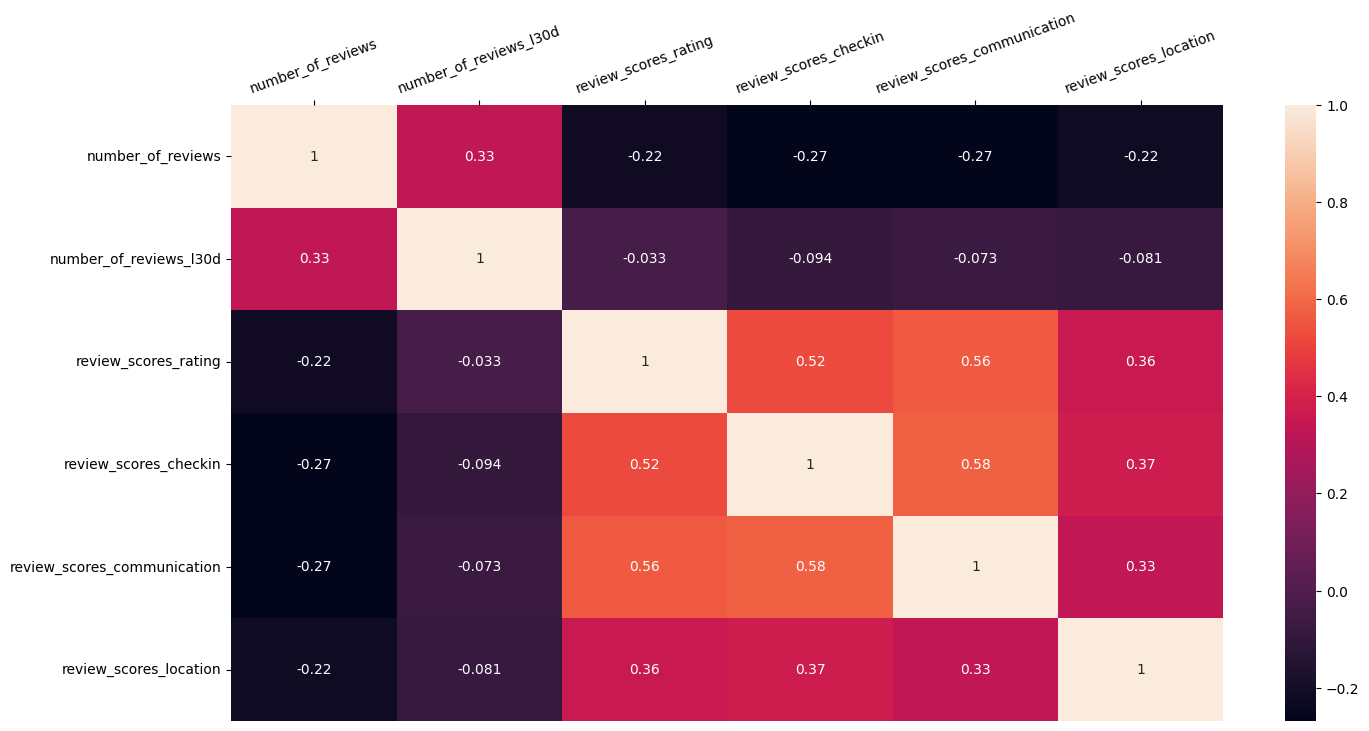

In [84]:
teste = df[[
    'number_of_reviews', #ok
    'number_of_reviews_l30d', #ok
    'review_scores_rating', #ok
    #'review_scores_accuracy',
    #'review_scores_cleanliness', # (nn tô incluindo outras features de review para ter melhor interpretabilidade dos resultados depois) 
    'review_scores_checkin', #ok
    'review_scores_communication', #ok
    'review_scores_location', #ok
    #'review_scores_value',
]].dropna().corr('kendall')

plt.figure(figsize=(16,8))
hm = sns.heatmap(teste, annot=True)
hm.set(xlabel="", ylabel="")
hm.xaxis.tick_top()
plt.xticks(rotation=20)
plt.show()

<Axes: >

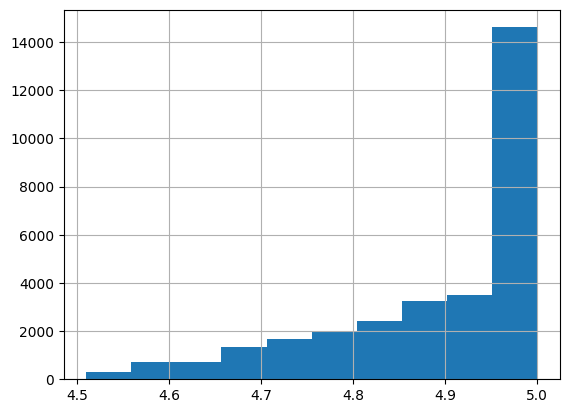

In [83]:
df.loc[df['review_scores_rating']>4.5,'review_scores_rating'].hist()

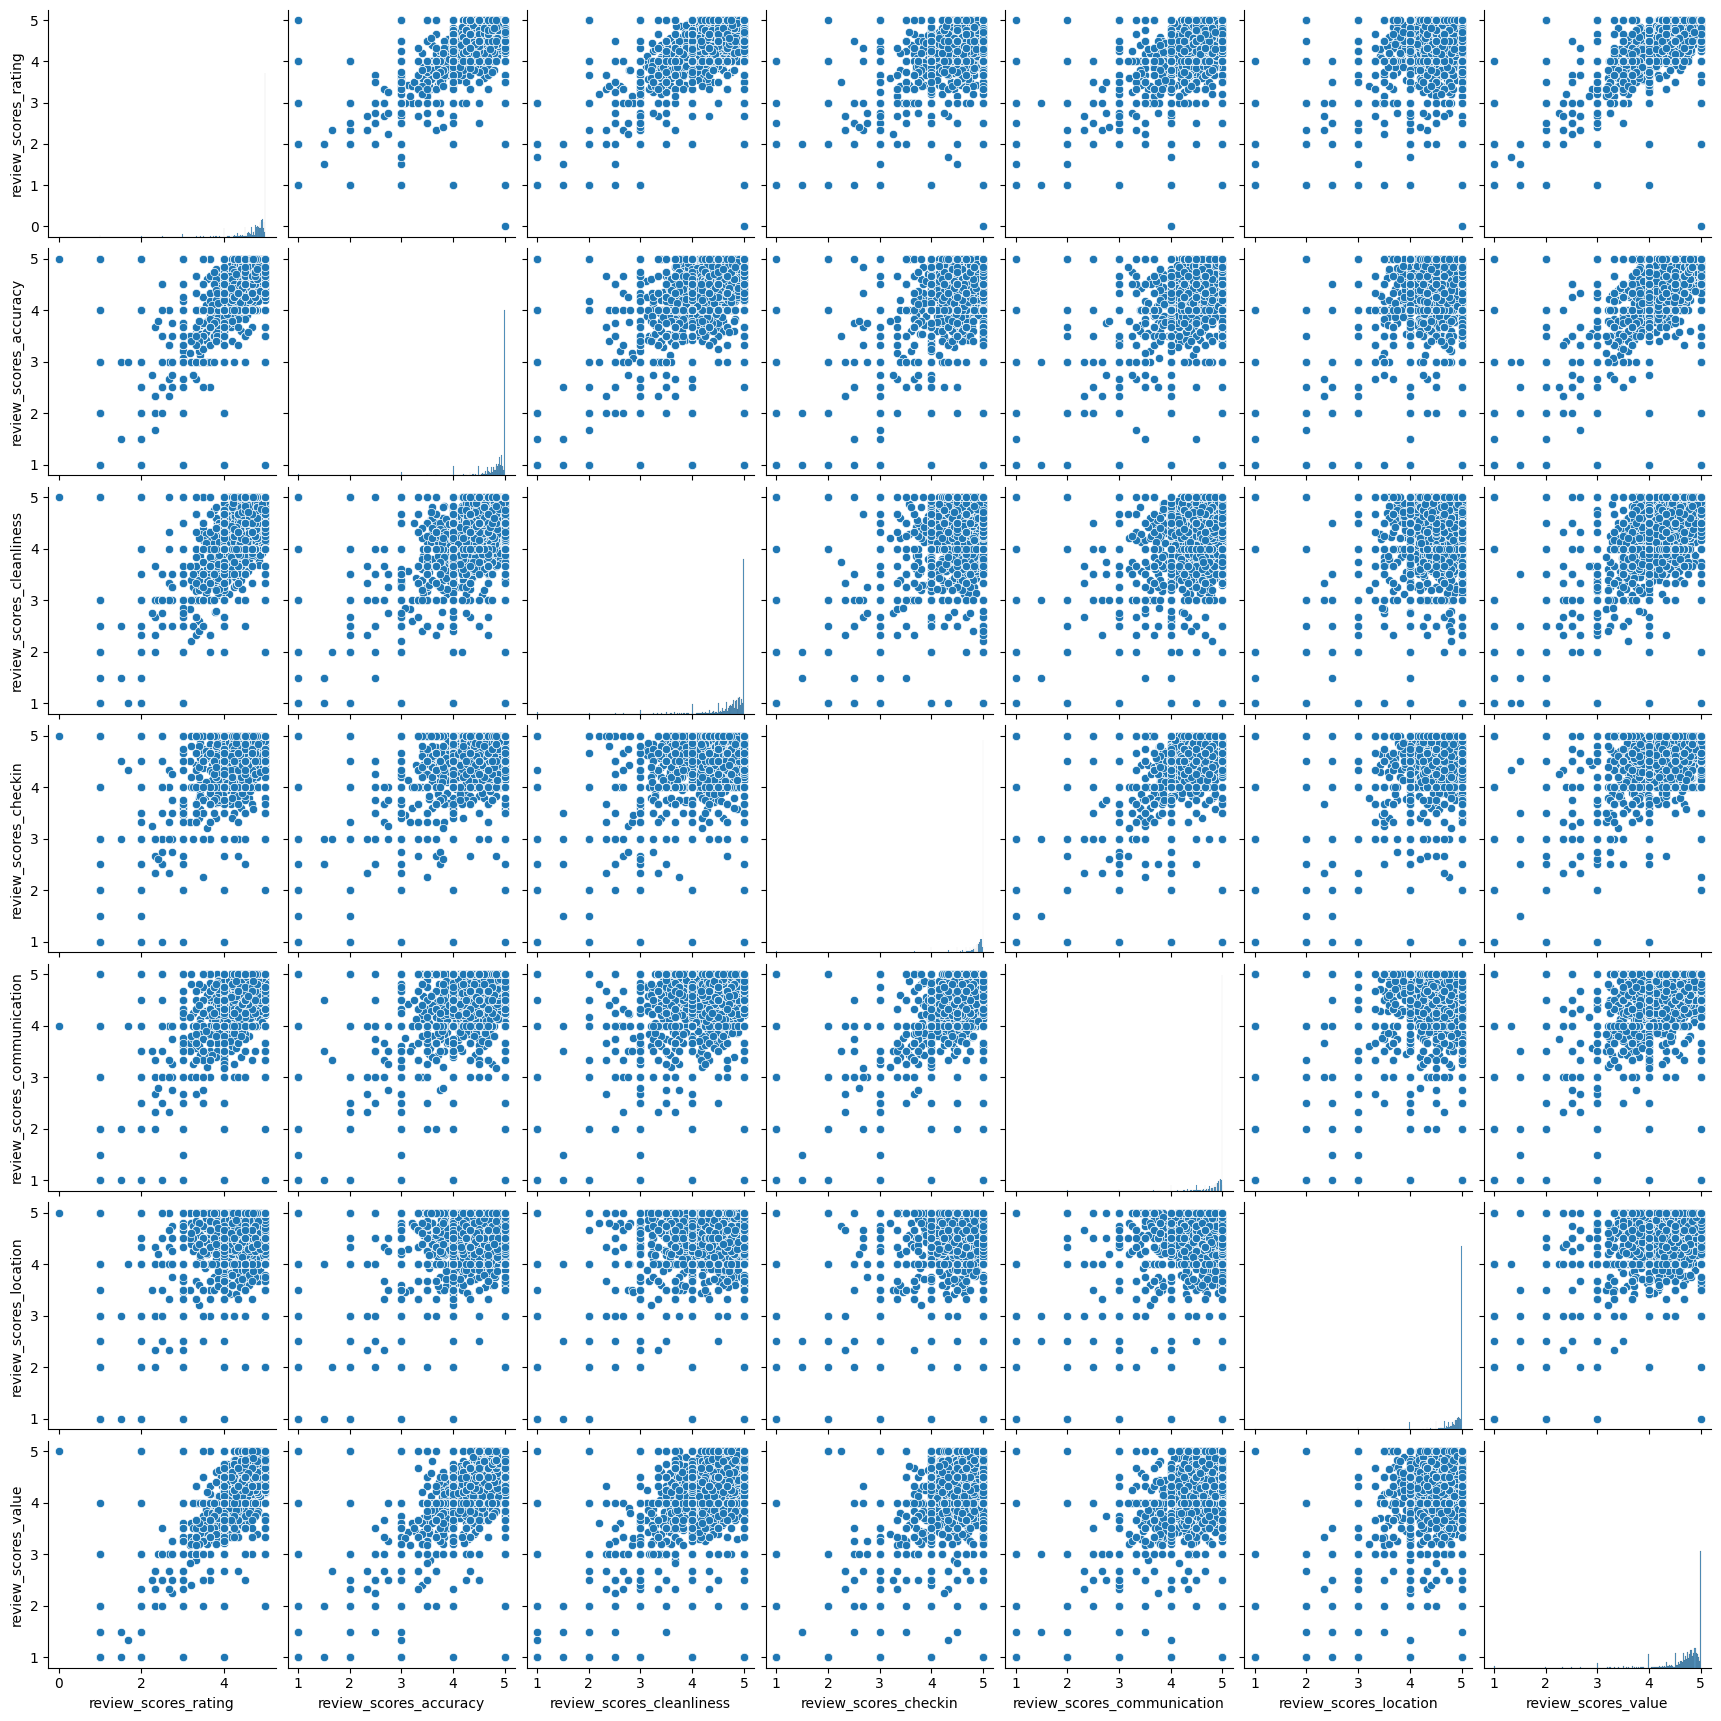

In [79]:
sns.pairplot(df[[
    #'number_of_reviews', #ok
    #'number_of_reviews_l30d', #ok
    'review_scores_rating', #ok
    'review_scores_accuracy',
    'review_scores_cleanliness', # (nn tô incluindo outras features de review para ter melhor interpretabilidade dos resultados depois) 
    'review_scores_checkin', #ok
    'review_scores_communication',
    'review_scores_location', #ok
    'review_scores_value',
]])

## info avaliabilidade

In [85]:
print(f'Size: {df.shape[0]} examples\n')

for i in range(df.shape[1]):
    col = df.columns[i]
    print(f'{i+1}:\t {col}  |  {df[col].dtype} ({df[col].nunique()})  |  nº NAN: {df[col].isna().sum()}')

Size: 42572 examples

1:	 id  |  int64 (42572)  |  nº NAN: 0
2:	 listing_url  |  object (42572)  |  nº NAN: 0
3:	 scrape_id  |  int64 (1)  |  nº NAN: 0
4:	 last_scraped  |  object (8)  |  nº NAN: 0
5:	 source  |  object (2)  |  nº NAN: 0
6:	 name  |  object (40289)  |  nº NAN: 0
7:	 description  |  object (38004)  |  nº NAN: 1011
8:	 neighborhood_overview  |  object (14274)  |  nº NAN: 26059
9:	 picture_url  |  object (41726)  |  nº NAN: 0
10:	 host_id  |  int64 (24935)  |  nº NAN: 0
11:	 host_url  |  object (24935)  |  nº NAN: 0
12:	 host_name  |  object (7058)  |  nº NAN: 1480
13:	 host_since  |  object (4948)  |  nº NAN: 1543
14:	 host_location  |  object (626)  |  nº NAN: 9848
15:	 host_about  |  object (8725)  |  nº NAN: 23175
16:	 host_response_time  |  object (4)  |  nº NAN: 8004
17:	 host_response_rate  |  object (85)  |  nº NAN: 8004
18:	 host_acceptance_rate  |  object (100)  |  nº NAN: 4994
19:	 host_is_superhost  |  object (2)  |  nº NAN: 1376
20:	 host_thumbnail_url  |  ob

In [92]:
df[[
    'minimum_nights',#ok (como o preço é apenas no momento, então vou deixar as noites apenas do momento também)
    'maximum_nights',#ok (como o preço é apenas no momento, então vou deixar as noites apenas do momento também)
    'minimum_minimum_nights',
    'maximum_minimum_nights',
    'minimum_maximum_nights',
    'maximum_maximum_nights',
    'minimum_nights_avg_ntm',
    'maximum_nights_avg_ntm',
    'has_availability',#ok
    'availability_30',#ok
    'availability_60',#ok
    'availability_90',#ok
    'availability_365'#ok
]]

,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365
0,5,28,5.0,5.0,28.0,28.0,5.0,28.0,t,4,21,31,225
1,2,60,2.0,2.0,60.0,60.0,2.0,60.0,t,1,1,29,193
2,3,15,3.0,5.0,7.0,15.0,3.1,14.8,t,7,15,30,103
3,7,89,6.0,15.0,89.0,89.0,14.1,89.0,t,23,53,83,351
4,3,1125,3.0,4.0,1125.0,1125.0,3.0,1125.0,t,15,20,50,311
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42567,2,365,2.0,4.0,365.0,365.0,2.0,365.0,t,11,41,71,137
42568,1,365,1.0,1.0,365.0,365.0,1.0,365.0,t,30,60,90,365
42569,1,365,1.0,5.0,1.0,365.0,1.2,170.6,t,24,44,74,213
42570,1,365,1.0,1.0,365.0,365.0,1.0,365.0,t,30,60,90,365


In [93]:
(df['minimum_nights']==df['minimum_minimum_nights']).value_counts()

True     38263
False     4309
Name: count, dtype: int64

In [94]:
(df['minimum_nights']==df['maximum_minimum_nights']).value_counts()

True     32434
False    10138
Name: count, dtype: int64

In [97]:
(df['minimum_nights']==df['minimum_nights_avg_ntm']).value_counts()

True     33219
False     9353
Name: count, dtype: int64

In [95]:
(df['maximum_nights']==df['minimum_maximum_nights']).value_counts()

True     37445
False     5127
Name: count, dtype: int64

In [96]:
(df['maximum_nights']==df['maximum_maximum_nights']).value_counts()

True     37233
False     5339
Name: count, dtype: int64

In [98]:
(df['maximum_nights']==df['maximum_nights_avg_ntm']).value_counts()

True     36711
False     5861
Name: count, dtype: int64

array([[<Axes: title={'center': 'estimated_occupancy_l365d'}>]],
      dtype=object)

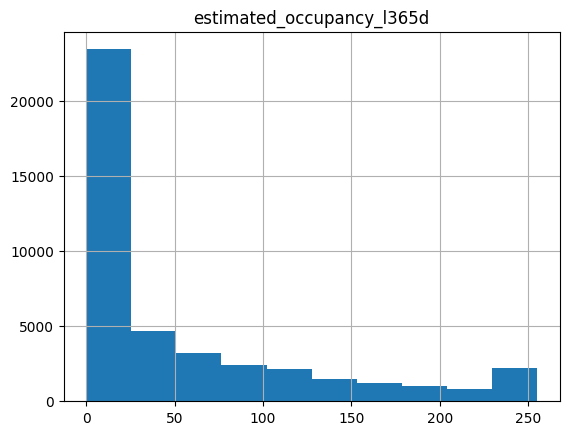

In [86]:
df[['estimated_occupancy_l365d']].hist()

# Chosen features

In [9]:
df = pd.read_csv('data/listings.csv')
#df.head()

In [10]:
bathrooms = df['bathrooms_text'].str.extract('([0-9\.]+)?([- A-Za-z]+)')#[[0,2]]
bathrooms[1] = bathrooms[1].apply(lambda x: x if pd.isna(x) else x.strip().lower().replace('baths','bath'))
bathrooms.columns = ['n_baths', 'bath_type']

for i in range(len(bathrooms)):
    bt = bathrooms.at[i,'bath_type']
    if(pd.notna(bt)):
        if(re.search('half', bt)):
            bt = re.sub('half-', '', bt)
            bathrooms.loc[i,:] = [0.5, bt]

        if(bt=='bath'):
            bathrooms.at[i,'bath_type'] = 'regular bath'
        #else:
        #    bathrooms.at[i,'bath_type'] = re.sub(' bath', '', bt)

df['bathrooms'] = bathrooms['n_baths']
df['bathroom_type'] = bathrooms['bath_type']

In [11]:
df = df[[
    'host_response_time', #ok
    'host_response_rate', #ok
    'host_is_superhost', #ok
    'host_total_listings_count', #ok
    'host_identity_verified', #ok
    'latitude', #ok
    'longitude', #ok
    'property_type',
    'room_type', #ok
    'accommodates', #ok
    'bathrooms', #ok (o atualizado, vindo de bathrooms_text)
    'bathroom_type', #ok
    'bedrooms', #ok
    'beds', #ok
    'number_of_reviews', #ok
    #'number_of_reviews_l30d', #ok
    'review_scores_rating', #ok
    'review_scores_checkin', #ok
    'review_scores_communication', #ok
    'review_scores_location', #ok
    'minimum_nights',#ok (como o preço é apenas no momento, então vou deixar as noites apenas do momento também)
    'maximum_nights',#ok (como o preço é apenas no momento, então vou deixar as noites apenas do momento também)
    'has_availability',#ok
    'availability_30',#ok
    #'availability_60',#ok
    #'availability_90',#ok
    #'availability_365',#ok
    'price'
]].dropna()

df

,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,...,number_of_reviews,review_scores_rating,review_scores_checkin,review_scores_communication,review_scores_location,minimum_nights,maximum_nights,has_availability,availability_30,price
0,within an hour,100%,f,5.0,t,-22.965990,-43.179400,Entire condo,Entire home/apt,5,...,338,4.71,4.83,4.91,4.78,5,28,t,4,$254.00
2,within an hour,100%,t,2.0,t,-22.981070,-43.191360,Entire loft,Entire home/apt,2,...,516,4.91,4.97,4.95,4.95,3,15,t,7,$190.00
3,within an hour,100%,t,33.0,t,-22.985910,-43.203020,Entire rental unit,Entire home/apt,13,...,183,4.77,4.84,4.84,4.95,7,89,t,23,"$2,239.00"
4,within an hour,100%,f,7.0,t,-22.965740,-43.175140,Entire rental unit,Entire home/apt,10,...,48,4.63,4.88,4.83,4.94,3,1125,t,15,$743.00
5,within an hour,93%,t,16.0,t,-22.979100,-43.190080,Entire rental unit,Entire home/apt,3,...,183,4.84,4.91,4.93,4.91,4,90,t,3,$189.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42439,within an hour,100%,f,2.0,t,-22.912430,-43.188830,Entire rental unit,Entire home/apt,3,...,1,2.00,3.00,3.00,1.00,2,365,t,30,$164.00
42445,within an hour,100%,f,4.0,t,-22.912850,-43.241580,Private room in rental unit,Private room,1,...,1,5.00,5.00,5.00,5.00,1,3,t,14,$67.00
42453,within an hour,100%,f,7.0,t,-22.966299,-43.176039,Entire rental unit,Entire home/apt,4,...,1,5.00,5.00,5.00,5.00,3,365,t,0,$380.00
42476,within an hour,93%,f,11.0,t,-22.915200,-43.192400,Private room in home,Private room,2,...,1,5.00,5.00,5.00,5.00,3,365,t,28,$81.00


In [5]:
def transform_property(x):
    x = re.sub('(Private room( in )?)|(Shared room( in )?)|(Entire )|(Room in )', '', x).lower()
    if(x=='casa particular'):
        x='home'
    
    if(x not in ['rental unit','home','condo','loft','serviced apartment']):
        x='other'

    return x

In [12]:
df.loc[:,'host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float)
df.loc[:,'host_response_time'] = df['host_response_time'].astype('category').cat.reorder_categories(['within an hour', 'within a few hours', 'within a day', 'a few days or more']).cat.codes.astype(int)
df.loc[:,['host_is_superhost','host_identity_verified','has_availability']] = df[['host_is_superhost','host_identity_verified','has_availability']].map(lambda x: x=='t').astype(bool)
df.loc[:,'property_type'] = df['property_type'].apply(transform_property)
df.loc[:,'price'] = df['price'].str.replace('[,\$]','', regex=True).astype(float)

In [14]:
df.dtypes

host_response_time              object
host_response_rate              object
host_is_superhost               object
host_total_listings_count      float64
host_identity_verified          object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                       object
bathroom_type                   object
bedrooms                       float64
beds                           float64
number_of_reviews                int64
review_scores_rating           float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
minimum_nights                   int64
maximum_nights                   int64
has_availability                object
availability_30                  int64
price                           object
dtype: object

In [9]:
df.head()

,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,...,review_scores_communication,review_scores_location,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,price
0,0,100.0,False,5.0,True,-22.96599,-43.17940,condo,Entire home/apt,5,...,4.91,4.78,5,28,True,4,21,31,225,254.0
2,0,100.0,True,2.0,True,-22.98107,-43.19136,loft,Entire home/apt,2,...,4.95,4.95,3,15,True,7,15,30,103,190.0
3,0,100.0,True,33.0,True,-22.98591,-43.20302,rental unit,Entire home/apt,13,...,4.84,4.95,7,89,True,23,53,83,351,2239.0
4,0,100.0,False,7.0,True,-22.96574,-43.17514,rental unit,Entire home/apt,10,...,4.83,4.94,3,1125,True,15,20,50,311,743.0
5,0,93.0,True,16.0,True,-22.97910,-43.19008,rental unit,Entire home/apt,3,...,4.93,4.91,4,90,True,3,3,33,196,189.0


In [41]:
df['property_type'].value_counts()

property_type
rental unit           21076
home                   1856
condo                  1399
other                  1004
loft                    651
serviced apartment      625
Name: count, dtype: int64

/tmp/ipykernel_48778/1243504623.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  sns.histplot(df[(df['price']<=1000)&(df['property_type'].str.contains('(loft)|(serviced apartment)|(other)', regex=True))], hue='property_type', x='price', kde=True)


<Axes: xlabel='price', ylabel='Count'>

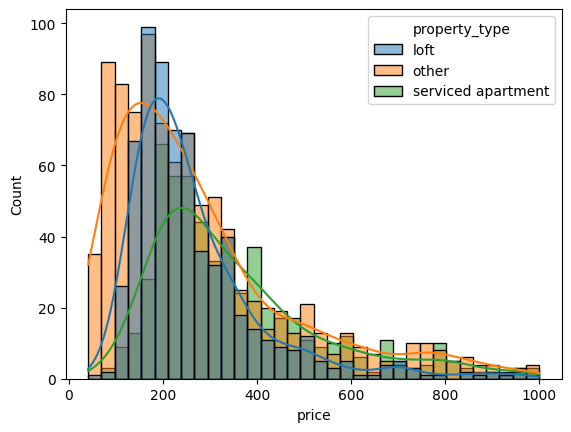

In [52]:
sns.histplot(df[(df['price']<=1000)&(df['property_type'].str.contains('(loft)|(serviced apartment)|(other)', regex=True))], hue='property_type', x='price', kde=True)

In [15]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler#, MinMaxScaler
from sklearn.model_selection import train_test_split
from train_models import CONFIG

onehot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler() 

/home/pbsl/pog/IC - Reject Option/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
X, y = df.drop(columns=['price']), df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=CONFIG['SEED'])

In [17]:
onehot=onehot.set_output(transform='pandas')
X_train = pd.concat([X_train.drop(columns=['property_type','room_type']), onehot.fit_transform(X_train[['property_type','room_type']], y_train)], axis=1)
X_test = pd.concat([X_test.drop(columns=['property_type','room_type']), onehot.transform(X_test[['property_type','room_type']])], axis=1)

X_train

,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,bathroom_type,...,property_type_condo,property_type_home,property_type_loft,property_type_other,property_type_rental unit,property_type_serviced apartment,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
19047,1,100.0,True,1.0,True,-22.966950,-43.183100,8,2,regular bath,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
24547,0,100.0,True,2.0,True,-22.984417,-43.192074,10,2.5,regular bath,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
24953,0,100.0,True,51.0,True,-22.985262,-43.225414,3,1,regular bath,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
39222,2,80.0,False,1.0,True,-22.983179,-43.192302,4,1,regular bath,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
32643,0,100.0,False,11.0,True,-22.909065,-43.178308,4,1,regular bath,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12272,0,100.0,True,4.0,False,-22.967110,-43.181930,4,1,regular bath,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
19103,2,85.0,True,3.0,True,-22.989250,-43.301080,16,16,regular bath,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25446,2,67.0,False,2.0,True,-22.981885,-43.195559,4,2,regular bath,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
14223,0,100.0,False,1.0,True,-22.890920,-43.272920,5,1,regular bath,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [18]:
X_train.dtypes

host_response_time                   object
host_response_rate                   object
host_is_superhost                    object
host_total_listings_count           float64
host_identity_verified               object
latitude                            float64
longitude                           float64
accommodates                          int64
bathrooms                            object
bathroom_type                        object
bedrooms                            float64
beds                                float64
number_of_reviews                     int64
review_scores_rating                float64
review_scores_checkin               float64
review_scores_communication         float64
review_scores_location              float64
minimum_nights                        int64
maximum_nights                        int64
has_availability                     object
availability_30                       int64
property_type_condo                 float64
property_type_home              

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

nmrc_cols = ['host_response_time','host_response_rate','host_total_listings_count',
            'latitude','longitude','accommodates','bathrooms','bedrooms','beds',
            'number_of_reviews','review_scores_rating','review_scores_checkin',
            'review_scores_communication','review_scores_location',
            'minimum_nights','maximum_nights','availability_30']

X_train_norm.loc[:,nmrc_cols] = scaler.fit_transform(X_train_norm[nmrc_cols])
X_test_norm.loc[:,nmrc_cols] = scaler.transform(X_test_norm[nmrc_cols])

X_train_norm

,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,bathroom_type,...,property_type_condo,property_type_home,property_type_loft,property_type_other,property_type_rental unit,property_type_serviced apartment,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
19047,0.577261,0.357327,True,-0.210616,True,-0.048431,0.591504,1.952102,0.722193,regular bath,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
24547,-0.609367,0.357327,True,-0.202017,True,-0.547119,0.495820,2.896405,1.338103,regular bath,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
24953,-0.609367,0.357327,True,0.219306,True,-0.571244,0.140326,-0.408655,-0.509627,regular bath,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
39222,1.763889,-0.657216,False,-0.210616,True,-0.511765,0.493388,0.063496,-0.509627,regular bath,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
32643,-0.609367,0.357327,False,-0.124631,True,1.604166,0.642600,0.063496,-0.509627,regular bath,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12272,-0.609367,0.357327,True,-0.184820,False,-0.052999,0.603979,0.063496,-0.509627,regular bath,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
19103,1.763889,-0.40358,True,-0.193419,True,-0.685092,-0.666479,5.729314,17.967677,regular bath,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25446,1.763889,-1.316669,False,-0.202017,True,-0.474823,0.458661,0.063496,0.722193,regular bath,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
14223,-0.609367,0.357327,False,-0.210616,True,2.122211,-0.366218,0.535648,-0.509627,regular bath,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [24]:
X_train_norm['host_response_time'] = X_train_norm['host_response_time'].astype(int)

In [25]:
X_train_norm.dtypes

host_response_time                    int64
host_response_rate                   object
host_is_superhost                    object
host_total_listings_count           float64
host_identity_verified               object
latitude                            float64
longitude                           float64
accommodates                        float64
bathrooms                            object
bathroom_type                        object
bedrooms                            float64
beds                                float64
number_of_reviews                   float64
review_scores_rating                float64
review_scores_checkin               float64
review_scores_communication         float64
review_scores_location              float64
minimum_nights                      float64
maximum_nights                      float64
has_availability                     object
availability_30                     float64
property_type_condo                 float64
property_type_home              

In [110]:
df['has_availability'].all()

np.True_

In [116]:
VALUE = 300#600 #1518
str(((y_train>=VALUE).sum()/len(y_train))*100)+'%'

'46.45255035574707%'

In [ ]:
df.loc[:,'price'] = df['price'].str.replace('[,\$]','', regex=True).astype(float)

In [ ]:
for col in X_train.columns:
    print(col, X_train[col].value_counts())

host_response_time host_response_time
0    13414
1     3728
2     1927
3      889
Name: count, dtype: int64
host_response_rate host_response_rate
100.0    14806
99.0       658
90.0       612
0.0        474
80.0       295
         ...  
61.0         1
76.0         1
15.0         1
24.0         1
23.0         1
Name: count, Length: 80, dtype: int64
host_is_superhost host_is_superhost
False    11134
True      8824
Name: count, dtype: int64
host_total_listings_count host_total_listings_count
1.0      5207
2.0      3380
3.0      2025
4.0      1225
5.0       966
         ... 
52.0        1
124.0       1
103.0       1
165.0       1
160.0       1
Name: count, Length: 112, dtype: int64
host_identity_verified host_identity_verified
True     17081
False     2877
Name: count, dtype: int64
latitude latitude
-22.980449    34
-22.899650    28
-22.900141    24
-22.980523    20
-22.909477    18
              ..
-22.912149     1
-22.915457     1
-22.970992     1
-22.994610     1
-22.907606     1
Name: c

In [111]:
X_train['bathroom_type'].value_counts()

bathroom_type
regular bath    17108
shared bath      1626
private bath     1224
Name: count, dtype: int64